<a href="https://colab.research.google.com/github/adrita23/Machine-Learning_Assignment_2/blob/main/Original_ML_Fall21_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fall 2021
#ML 633: Machine Learning
#Homework: 2 
#Date: October 7, 2021
#Author: Adrita Anika

In [2]:
#Question 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
data = pd.read_csv('/content/drive/MyDrive/ML HW/hw2_data.csv') 

In [5]:
data.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,2598
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,1568


**Question 2: Machine Learning with Pokemon Go**

**i. Data exploration:** Column 8 is categorical and Column 2-Column 7 are numerical attributes of this dataset.

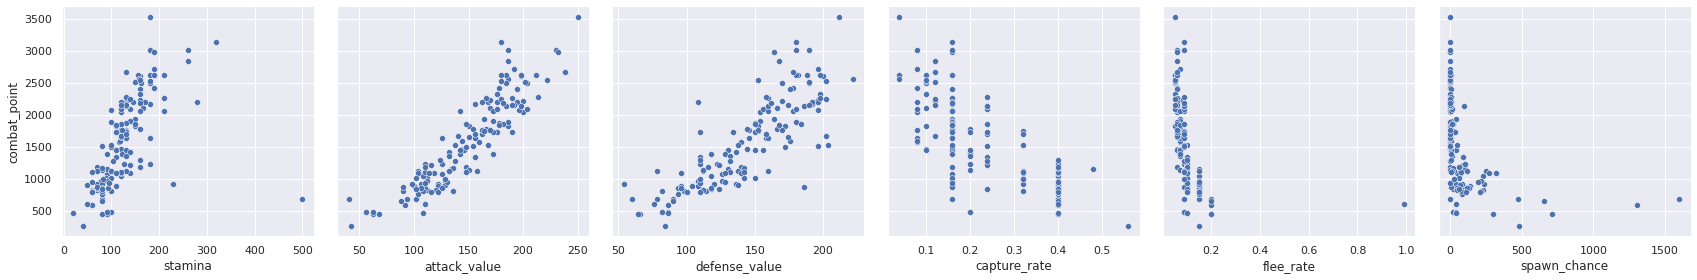

In [29]:
# ii. Plot 2D Scatter Plots
# for columns 2-6
#fig, axes = plt.subplots(1, 6)
g = sns.PairGrid(data, y_vars=["combat_point"], x_vars= ["stamina", "attack_value", "defense_value", "capture_rate", "flee_rate", "spawn_chance"], height = 4)
g.map(sns.scatterplot)

Text(0.5, 1.0, 'combat_point vs primary_strength')

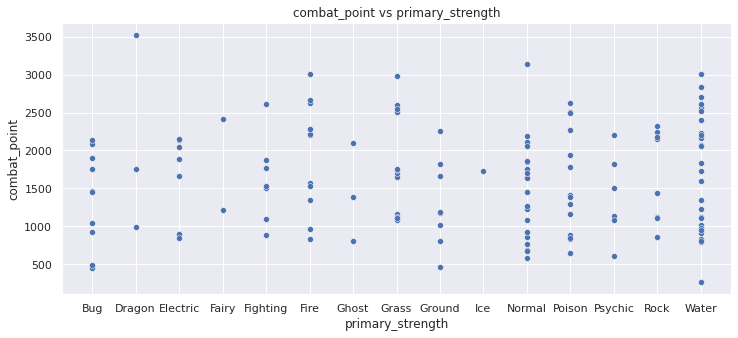

In [7]:
#for column 7
data[data.columns[-2]] = data[data.columns[-2]].astype('category')
#data.describe(include='category')
sns.set(rc = {'figure.figsize':(12,5)})
ax2 = sns.scatterplot( x=data.columns[-2], y=data.columns[-1], data=data)
ax2.set_title(data.columns[-1]+ " vs "+ data.columns[-2])

In [8]:
#calculate pearson coefficient
#pearson_r = []
from scipy import stats
for i in range(1, 7):
  #print(len(data.columns[i]), len(data.columns[-1]))
  pearson_r, p = stats.pearsonr(data[data.columns[i]], data[data.columns[-1]])
  print(f"The Pearson coefficient between {data.columns[-1]} and {data.columns[i]} are: {round(pearson_r,4)}")

The Pearson coefficient between combat_point and stamina are: 0.5828
The Pearson coefficient between combat_point and attack_value are: 0.9075
The Pearson coefficient between combat_point and defense_value are: 0.8262
The Pearson coefficient between combat_point and capture_rate are: -0.743
The Pearson coefficient between combat_point and flee_rate are: -0.407
The Pearson coefficient between combat_point and spawn_chance are: -0.4213


**ii. Data Exploration:**
The corelation is maximum between the combat point and attack value (0.9075) and the second maximum corelation is between the combat point and defense value (0.8262).  So, attack value and defense value are the most predictive features of the outcome of comabat points.

In [9]:
numerical_attributes = data.columns[1:-2]
#print(numerical_attributes)
from itertools import combinations
 
comb = list(combinations(numerical_attributes, 2))
print(comb, len(comb))

[('stamina', 'attack_value'), ('stamina', 'defense_value'), ('stamina', 'capture_rate'), ('stamina', 'flee_rate'), ('stamina', 'spawn_chance'), ('attack_value', 'defense_value'), ('attack_value', 'capture_rate'), ('attack_value', 'flee_rate'), ('attack_value', 'spawn_chance'), ('defense_value', 'capture_rate'), ('defense_value', 'flee_rate'), ('defense_value', 'spawn_chance'), ('capture_rate', 'flee_rate'), ('capture_rate', 'spawn_chance'), ('flee_rate', 'spawn_chance')] 15


The Pearson coefficient between stamina and attack_value are: 0.303
The Pearson coefficient between stamina and defense_value are: 0.3027
The Pearson coefficient between stamina and capture_rate are: -0.4469
The Pearson coefficient between stamina and flee_rate are: -0.271
The Pearson coefficient between stamina and spawn_chance are: -0.2764
The Pearson coefficient between attack_value and defense_value are: 0.7368
The Pearson coefficient between attack_value and capture_rate are: -0.6906
The Pearson coefficient between attack_value and flee_rate are: -0.3691
The Pearson coefficient between attack_value and spawn_chance are: -0.4326
The Pearson coefficient between defense_value and capture_rate are: -0.6973
The Pearson coefficient between defense_value and flee_rate are: -0.4239
The Pearson coefficient between defense_value and spawn_chance are: -0.4325
The Pearson coefficient between capture_rate and flee_rate are: 0.4405
The Pearson coefficient between capture_rate and spawn_chance a

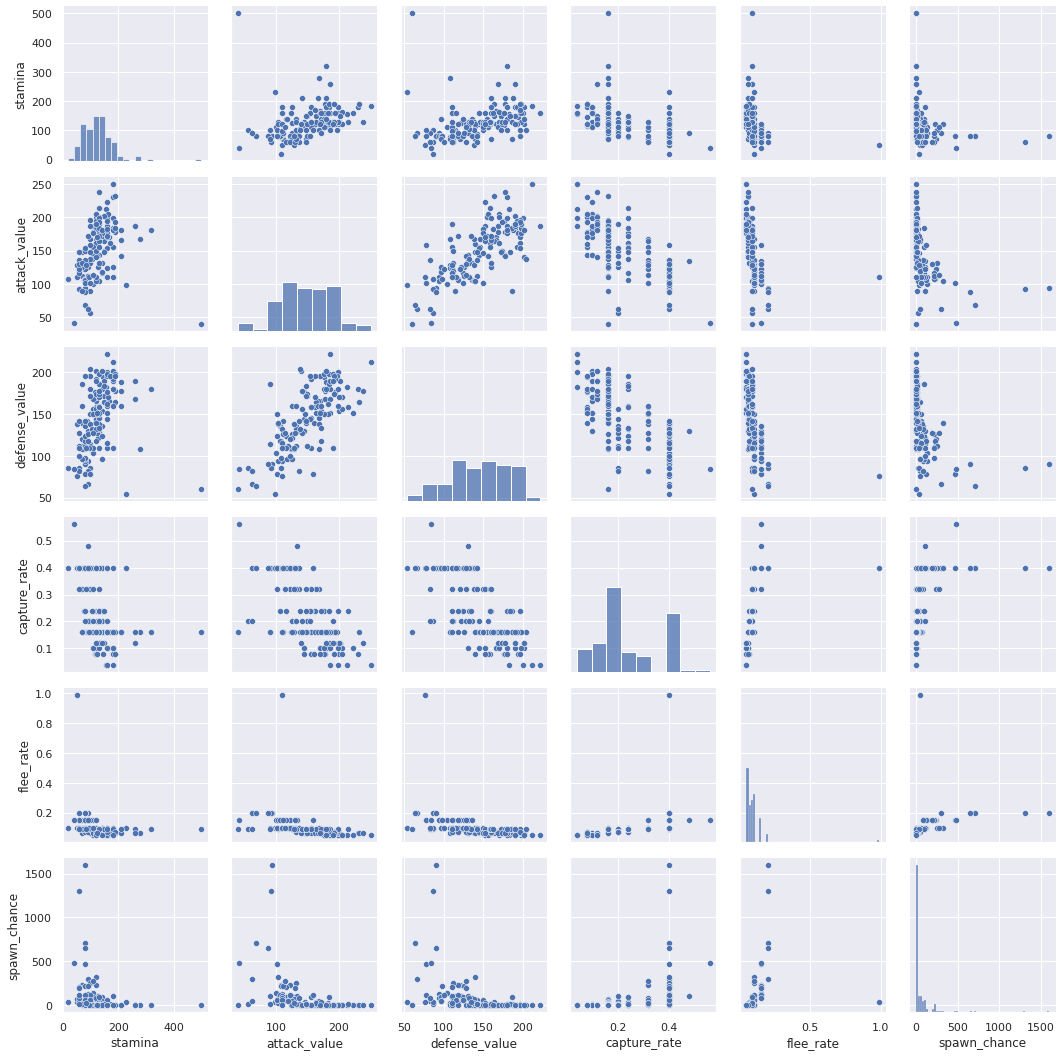

In [10]:
# iii. Plot scatters plots between the features and see thier correlation
#fig, axes = plt.subplots(3, 5)
#sns.set(rc = {'figure.figsize':(25,10)})
j = 0
for i in range(len(comb)):
  feature1 = comb[i][0]
  feature2 = comb[i][1]
  #sns.scatterplot(ax=axes[j][i%5], x=data[feature1], y = data[feature2], ,data = data)
  #axes[j][i%5].set_title(feature1 + " vs " + feature2)
  if (i+1)%5 ==0:
    j+=1
  pearson_r, p = stats.pearsonr(data[feature1], data[feature2])
  print(f"The Pearson coefficient between {feature1} and {feature2} are: {round(pearson_r,4)}")
g = sns.PairGrid(data, y_vars=["stamina", "attack_value", "defense_value", "capture_rate", "flee_rate", "spawn_chance"], x_vars= ["stamina", "attack_value", "defense_value", "capture_rate", "flee_rate", "spawn_chance"])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

#calculate correlation matrix and plot heatmap
dataC = data[1:-2]
cormat = dataC.corr()
#print(round(cormat,4))


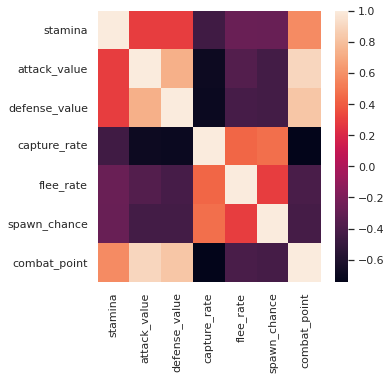

In [11]:
#calculate correlation matrix and plot heatmap
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cormat)

**iii. Data Exploration**
From the observation of pearson coefficient between different features and from the heatmap, it is evident that attack value and defense value are mostly correlated to each other. 

In [12]:
# Pre-processing of categorical values with one hot encoding

#print(data["primary_strength"].unique())
#print(data["primary_strength"].value_counts())
one_hot_encoded_data = pd.get_dummies(data, columns = ['primary_strength'])
print(one_hot_encoded_data.head)

<bound method NDFrame.head of            name  stamina  ...  primary_strength_Rock  primary_strength_Water
0     Bulbasaur       90  ...                      0                       0
1       Ivysaur      120  ...                      0                       0
2      Venusaur      160  ...                      0                       0
3    Charmander       78  ...                      0                       0
4    Charmeleon      116  ...                      0                       0
..          ...      ...  ...                    ...                     ...
141  Aerodactyl      160  ...                      1                       0
142     Snorlax      320  ...                      0                       0
143     Dratini       82  ...                      0                       0
144   Dragonair      122  ...                      0                       0
145   Dragonite      182  ...                      0                       0

[146 rows x 23 columns]>


**iv Pre-processing of categorical values with one hot encoding**
So the catogorical attribut primary_strength has been converted to numerical attributes using one hot encoding

In [13]:
#v. Implementing Linear Regression with Closed Form Solution
class Linear_regression:

  def __init__(self, X_train, Y_train, num_params = False):
    self.Y_train = Y_train
    # X_train is a N x D dimensional matrix, where N is the number of samples and D is the numebr of features 
    N, D = X_train.shape
    a = np.ones([N, 1])
    self.X_train = np.hstack((a, X_train))
    self.num_params = num_params

  def fit(self):
    #Ordinary least square solution
    A =  np.linalg.pinv(np.matmul((self.X_train).T, self.X_train)) 
    B = np.matmul((self.X_train).T, self.Y_train)
    self.w = np.matmul(A,B)
    if self.num_params:
      print("The number of parameters", len(self.w))

  def predict(self, X_test):
    n, D = X_test.shape
    a = np.ones([n, 1])
    X_test = np.hstack((a, X_test))
    #print("X_test_shape", X_test.shape)
    res = np.matmul(X_test, self.w)
    return res


In [14]:
one_hot_encoded_data2 = one_hot_encoded_data
Y = one_hot_encoded_data["combat_point"].to_numpy().reshape(146,1)
#print(Y.shape)
name = one_hot_encoded_data["name"].to_numpy()
one_hot_encoded_data.drop(["combat_point", "name"], axis=1, inplace=True)
X =one_hot_encoded_data.to_numpy()
#print(X.shape)
data_np = np.hstack((X,Y))

In [15]:
#Random shuffling and splitting into 5 folds
X_train = {}
Y_train = {}

np.random.shuffle(data_np)
X_train[0], Y_train[0] = data_np[0:29, :-1], data_np[0:29, -1].reshape(29,1)
X_train[1], Y_train[1] = data_np[1*29: 1*29+29, :-1], data_np[1*29: 1*29+29, -1].reshape(29,1)
X_train[2], Y_train[2] = data_np[2*29: 2*29+29, :-1], data_np[2*29: 2*29+29, -1].reshape(29,1)
X_train[3], Y_train[3] = data_np[3*29: 3*29+29, :-1], data_np[3*29:3*29+29, -1].reshape(29,1)
X_train[4], Y_train[4] = data_np[4*29: , :-1], data_np[4*29: , -1].reshape(30,1)

In [16]:
#cross_validation
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred- Y_Actual))
      return np.sqrt(rss_error/len(Y_Pred))

fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 21])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ], num_params=True)
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))
  
print("The average root of RSS error or the RMSE error is: ", np.average(fold_RSS))

The number of parameters 22
The number of parameters 22
The number of parameters 22
The number of parameters 22
The number of parameters 22
The average root of RSS error or the RMSE error is:  146.58637809343688


**v. Linear Regression and Cross Validation**

There are 22 parameteres. That is,  6 numerical attributes + 15 attributes for converting the categorical attribut ro numerical attribute + the bias term.

The average root of RSS Error for each sample or the RMSE error is approximately 150.



In [17]:
# With l2 Regularization
class Linear_regression_with_l2_reg:

  def __init__(self, X_train, Y_train, reg_coeff, return_weight =False):
    self.Y_train = Y_train
    # X_train is a N x D dimensional matrix, where N is the number of samples and D is the numebr of features 
    N, self.D = X_train.shape
    a = np.ones([N, 1])
    self.X_train = np.hstack((a, X_train))
    self.reg_coeff = reg_coeff
    self.return_weight = return_weight


  def fit(self):
    #Ordinary least square solution
    I = self.reg_coeff * np.eye(self.D+1)
    A =  np.linalg.pinv(np.matmul((self.X_train).T, self.X_train)+I) 
    B = np.matmul((self.X_train).T, self.Y_train)
    self.w = np.matmul(A,B)
    #print("The number of parameters", len(self.w))
    if self.return_weight == True:
     return self.w[0], self.w[1:]

  def predict(self, X_test):
    n, self.D = X_test.shape
    a = np.ones([n, 1])
    X_test = np.hstack((a, X_test))
    #print("X_test_shape", X_test.shape)
    res = np.matmul(X_test, self.w)
    return res

In [18]:
#cross_validation with l2
#Lambda = [5, 4.5, 4, 3.5, 3, 2.5, 2.0, 1.5, 1.00, 0.75, 0.5, 0.1, 0.05, 0.01, 0.001]
Lambda = np.linspace(0.000000001, 5, 500) 
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred - Y_Actual))
      return np.sqrt(rss_error/len(Y_Pred))

fold_RSS_reg_l2 = []
RSS_reg_coeff = []
for r in Lambda:
  for i in range(5):
    XTrain = np.ones([1, 21])
    YTrain = np.ones([1, 1])
    for j in range(5):
      if i!= j: 
        XTrain = np.vstack((XTrain, X_train[j]))
        YTrain = np.vstack((YTrain, Y_train[j]))
    X_test = X_train[i]
    Y_test = Y_train[i]

    LP2 = Linear_regression_with_l2_reg(XTrain[1: ], YTrain[1: ], r)
    LP2.fit()
    Y_Pred = LP2.predict(X_test)
    fold_RSS_reg_l2.append(RSS(Y_Pred, Y_test))
  RSS_reg_coeff.append(np.average(fold_RSS_reg_l2))


We get the miinmum error when the regularization co-efficient value is: 0.5611222453767535


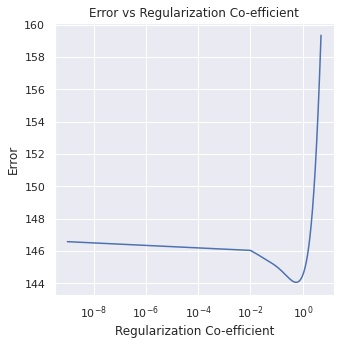

In [19]:
#print(RSS_reg_coeff)
sns.set(rc = {'figure.figsize':(5,5)})
plt.semilogx(Lambda, RSS_reg_coeff)
plt.xlabel("Regularization Co-efficient")
plt.ylabel("Error")
plt.title("Error vs Regularization Co-efficient")
best_lambda_l2 = Lambda[RSS_reg_coeff.index(min(RSS_reg_coeff))]
print("We get the miinmum error when the regularization co-efficient value is:" , best_lambda_l2)

**vi. Linear Regression with l2 regularization and Cross Validation**
From the graph, we see that the performance does not vary much across different values of regularization co-efficient. However, we get the minimum error when  it is approximately 0.1.

In [20]:
#Randomly split train and test data 
import numpy as np
from sklearn.model_selection import train_test_split

X = data_np[:, :-1]
y = data_np[:,-1]

avg = y - np.average(y)
for i in range(len(avg)):
  if avg[i]<0:
    y[i] = 0
  else:
    y[i] = 1

XL_train, XL_test, yL_train, yL_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#feature combinations
categorical_vals = ['primary_strength_Bug', 'primary_strength_Dragon','primary_strength_Electric', 'primary_strength_Fairy', 'primary_strength_Fighting', 'primary_strength_Fire', 'primary_strength_Ghost', 'primary_strength_Grass','primary_strength_Ground', 'primary_strength_Ice','primary_strength_Normal', 'primary_strength_Poison', 'primary_strength_Psychic', 'primary_strength_Rock','primary_strength_Water']
list1 = ["attack_value", "defense_value"]
list2 = ["stamina", "attack_value", "defense_value"]
list3 = ["flee_rate", "capture_rate", "spawn_chance"]

f_comb1 = one_hot_encoded_data2[list1 + categorical_vals].to_numpy()
f_comb2 = one_hot_encoded_data2[list2 + categorical_vals].to_numpy()
f_comb3 = one_hot_encoded_data2[list3  + categorical_vals].to_numpy()
outcomes = Y

X_train = {}
Y_train = {}

X_train[0], Y_train[0] = f_comb1[0:29, :], outcomes[0:29].reshape(29,1)
X_train[1], Y_train[1] = f_comb1[1*29: 1*29+29, :], outcomes[1*29: 1*29+29].reshape(29,1)
X_train[2], Y_train[2] = f_comb1[2*29: 2*29+29, :], outcomes[2*29: 2*29+29].reshape(29,1)
X_train[3], Y_train[3] = f_comb1[3*29: 3*29+29, :], outcomes[3*29:3*29+29].reshape(29,1)
X_train[4], Y_train[4] = f_comb1[4*29: , :], outcomes[4*29:].reshape(30,1)

#cross_validation for feature combination 1
fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 17])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))
  
print("The score for attack values, defense values and categrical values are", np.average(fold_RSS))

X_train[0] = f_comb2[0:29, :]
X_train[1] = f_comb2[1*29: 1*29+29, :]
X_train[2] = f_comb2[2*29: 2*29+29, :]
X_train[3] = f_comb2[3*29: 3*29+29, :]
X_train[4] = f_comb2[4*29: , :]

#cross_validation for feature combination 2 
fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 18])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))


print("The score for stamina, attack values, defense values and categrical values are", np.average(fold_RSS))
###
X_train[0] = f_comb3[0:29, :]
X_train[1] = f_comb3[1*29: 1*29+29, :]
X_train[2] = f_comb3[2*29: 2*29+29, :]
X_train[3] = f_comb3[3*29: 3*29+29, :]
X_train[4] = f_comb3[4*29: , :]

#cross_validation for feature combination 3
fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 18])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))

print("The score for flee rate, capture rate, spawn chance and categrical values are", np.average(fold_RSS))

The score for attack values, defense values and categrical values are 257.5646192035376
The score for stamina, attack values, defense values and categrical values are 162.36007161620753
The score for flee rate, capture rate, spawn chance and categrical values are 727.929850865449


**vii. Experiment with different feature combinations**

From ii and iii, we saw that the most correlated features with the outcome (combat point) are attack valueand defenese value. Also, flee rate, capture rate and spawn chance are negatively correlated. And stamina is also positively correlated with the outcome. So we experimented with three sets of features. 

1.   Features Set 1: Attack Value, Defense Value and Categorical Value
2.   Features Set 2: Stamina, Attack Value, Defense Value and Categorical Value
3.   Fetaures Set 3: Flee Rate, Capture Rate, Spawn Chance and Categorical Value

Based on our findings, the best outcome has been achieved for Feature Set 2 followed by Feature Set 1. This is because these features are the most correlated feautures. The error is almost 4 times higher for Feature Set 3. 



In [22]:
##Weights for linear Regression with l1 regularization

from sklearn import linear_model
#Select the best co-efficient for l1 regularization
scores = []
Lambda2 = [2, 1.75, 1.5, 1.125, 1.00, 0.75, 0.5, 0.25, 0.1, 0.2, 0.05, 0.01, 0.005, 0.001, 0.0001]
for x in Lambda2:
  clf = linear_model.Lasso(x)
  clf.fit(XL_train, yL_train)
  scores.append(clf.score(XL_test, yL_test))
best_coeff = Lambda[scores.index(min(scores))]
print("Best co-efficient with l1 normalization", min(scores), Lambda[scores.index(min(scores))])

#Get parameters for l1 regularization
clf = linear_model.Lasso(best_coeff)
clf.fit(XL_train, yL_train)
scores.append(clf.score(XL_test, yL_test))
intercept1_ = clf.intercept_
coef1_ = clf.coef_

Best co-efficient with l1 normalization 0.6967108899850004 1e-09


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.040069643510159736, tolerance: 0.0029000000000000002
  positive)


In [23]:
#Get parameters for l2 regularization
clf = Linear_regression_with_l2_reg(XL_train, yL_train, best_lambda_l2, return_weight= True)
intercept2_, coef2_ = clf.fit()

In [24]:
#Compare the weights for l1 and l2 regularizaion
i=0
columns = list(one_hot_encoded_data2.columns)
lis1 = []
lis1.append(["intercept", intercept1_, intercept1_])
for column in columns:
  lis2 = [column, coef1_[i], coef2_[i]]
  lis1.append(lis2)
  i +=1
df =  pd.DataFrame(lis1, columns =["Features", "l1 Regularization Weight", "l2 Regularization Weight"])
df

,Features,l1 Regularization Weight,l2 Regularization Weight
0,intercept,-1.163852,-1.163852
1,stamina,0.001499,0.001356
2,attack_value,0.005842,0.005417
3,defense_value,0.004440,0.003884
4,capture_rate,-0.426514,-0.436971
5,flee_rate,0.385130,0.094397
6,spawn_chance,0.000166,0.000120
7,primary_strength_Bug,0.103530,0.018407
8,primary_strength_Dragon,-0.094618,-0.100001
9,primary_strength_Electric,0.081128,0.012612


**viii. Comparison of Paramenters for Linear Regression with l1 and l2 regularization**

From the dataframe above, we can see that for l1 regularization, the three features which are positively correlated with the outcome (combat point) have non zero weights. Howwever, for l2 regularization, every feature has non zero weights.

In [ ]:
#A logistic regression  model  to  classify  between  low  and  high  combat  points.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none').fit(XL_train, yL_train)

In [26]:
#score and test the classifier
clf.predict(XL_test)
#print("The probability of the outcomes are: ")
#print(clf.predict_proba(XL_test))
print("The score of the classifier on the test set is: ")
print(clf.score(XL_test, yL_test))

The score of the classifier on the test set is: 
0.8666666666666667


**ix. Logistic regression  model  to  classify  between  low  and  high  combat  points.**
After splitting the train data and test data, we got almost 99% accuracy for classifying low combat points and high combat points with logistic regression.

In [ ]:
#A logistic  regression  model  with  regularization  to  classify  between  low and  high  combat  points
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = np.linspace(0.0, 10, 50)
hyperparameters = dict(C=C, penalty = penalty)
kfold = KFold(n_splits= 5)

rsearch = GridSearchCV(model, hyperparameters, cv = kfold)
rsearch.fit(XL_train, yL_train)


In [28]:
print(clf.score(XL_test, yL_test))
print(rsearch.best_params_)

0.8666666666666667
{'C': 2.0408163265306123, 'penalty': 'l2'}


**ix. A  logistic  regression  model  with  regularization  to  classify  between  low and  high  combat  points**

With the same train and test set, we fount that the best accuracy is acheived for l2 regularization with a coefficient of 3.46

In [30]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!jupyter nbconvert --to pdf Original_ML_Fall21_HW2.ipynb